In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from functions.utility import *

# Metrics

In [3]:
from functions.metrics import *
"""
Test that metric functions behave as expected for perfect similarity:
MSE, MAE, RMSE = 0.
PSNR = infinity.
SSIM = 1.
"""
im = get_im("no_black_logo.jpg")

print("MSE", mse(im, im))
print("RMSE", rmse(im, im))
print("MAE", mae(im, im))
print("PSNR", psnr(im, im))
print("SSIM", ssim(im, im))

MSE 0.0
RMSE 0.0
MAE 0.0
PSNR inf
SSIM 0.9999999999999998


# Test Upsampling

QUESTION - We want to upsample while in the [0,1] floating point range, but do we want to convert back to uint8 [0, 255] format before measuring metrics, or stay in floating point range?

Answer - we will probably want to convert back to uint8 [0, 255] for the visual aspect, but this will obviously result in some error as we are translating the floating point space into a larger space of values. This will give me a chance to put my numerical analysis skills to use.

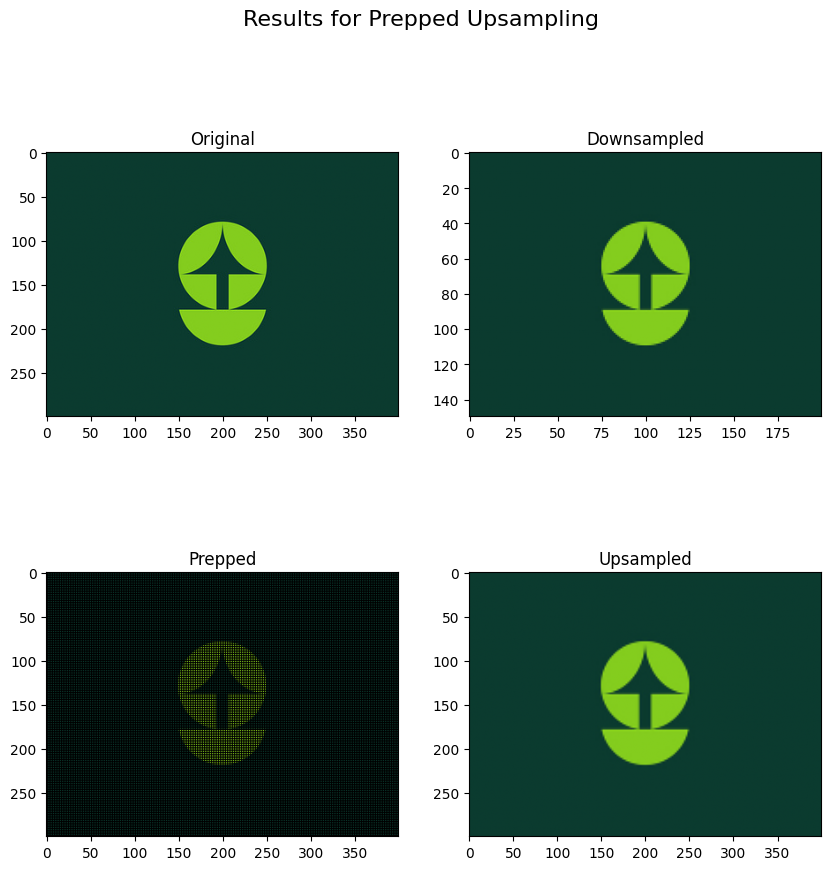

MSE 0.0010512757392989876
RMSE 0.03242338260112581
MAE 0.007079260620915033
PSNR 77.91363718721945
SSIM 0.999994081643056


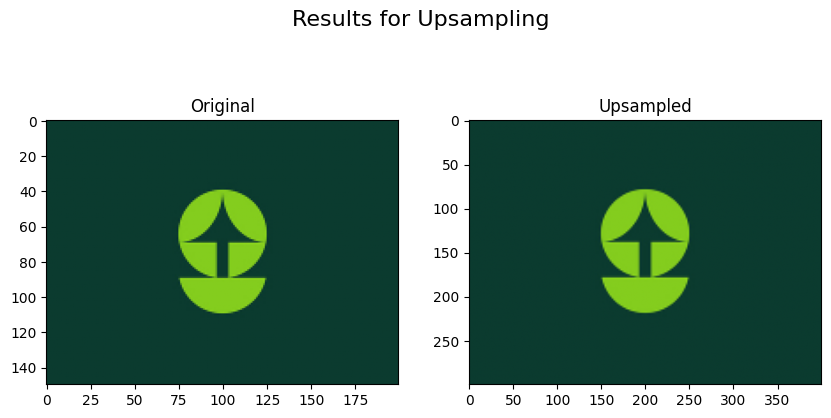

MSE 0.0010512757392989876
RMSE 0.03242338260112581
MAE 0.007079260620915033
PSNR 77.91363718721945
SSIM 0.999994081643056

AS YOU CAN SEE, BOTH PREPPED AND NO-PREP IMPLEMENTATIONS PRODUCE IDENTICAL RESULTS.
IT IS ONLY THE ADDED CONTROL WITH THE PREPPED VERSION THAT MAY MAKE ITS USE
BENEFICIAL FOR MORE COMPLEX UPSCALING SITUATIONS.


In [4]:
from functions.sampling import *
"""
Test upsampling for prepped approach.
"""
im = get_im("no_black_logo.jpg").astype(float) / 255.0
im = make_even_shape(im)

smaller_im = cv2_downsample(im)
prepped_im = prep_upsample(smaller_im)

upsampled_im = KNN_upsample_prepped(prepped_im, k=1)

display_prepped_upsampling_results([im, smaller_im, prepped_im, upsampled_im])

print("MSE", mse(im, upsampled_im))
print("RMSE", rmse(im, upsampled_im))
print("MAE", mae(im, upsampled_im))
print("PSNR", psnr(im, upsampled_im))
print("SSIM", ssim(im, upsampled_im))

"""
Test upsampling for no-prep approach.
"""
im = get_im("no_black_logo.jpg").astype(float) / 255
im = make_even_shape(im)

smaller_im = cv2_downsample(im)

upsampled_im = KNN_upsample_no_prep(smaller_im, k=1)

display_upsampling_results(smaller_im, upsampled_im)

print("MSE", mse(im, upsampled_im))
print("RMSE", rmse(im, upsampled_im))
print("MAE", mae(im, upsampled_im))
print("PSNR", psnr(im, upsampled_im))
print("SSIM", ssim(im, upsampled_im))

# Can delete this later
print("\nAS YOU CAN SEE, BOTH PREPPED AND NO-PREP IMPLEMENTATIONS PRODUCE IDENTICAL RESULTS.\nIT IS ONLY THE ADDED CONTROL WITH THE PREPPED VERSION THAT MAY MAKE ITS USE\nBENEFICIAL FOR MORE COMPLEX UPSCALING SITUATIONS.")

Original shape (300, 400, 3)


c:\Users\Ematt\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Ematt\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Result (upsampled) shape (900, 1200, 3)


c:\Users\Ematt\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


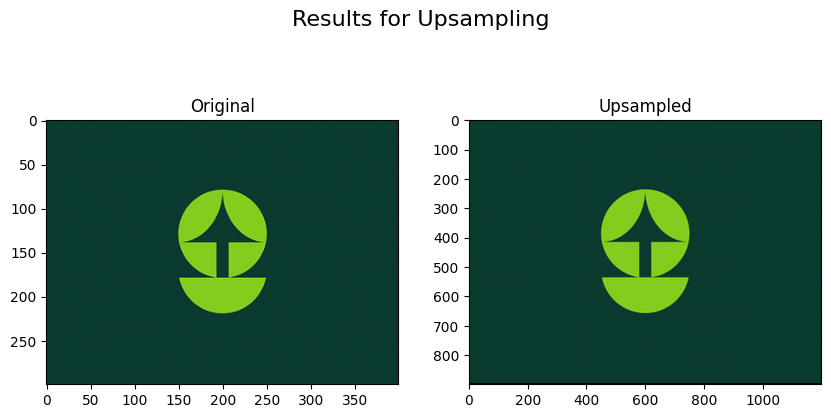

In [5]:
"""
Test upsampling for no-prep approach with variable factor.
"""
im = get_im("no_black_logo.jpg").astype(float) / 255
im = make_even_shape(im)
print("Original shape", im.shape)

upsampled_im = KNN_upsample_variable_factor(im, k=1, factor=3)
print("Result (upsampled) shape", upsampled_im.shape)

display_upsampling_results(im, upsampled_im)

# Cannot compute metrics when upsampling to a shape dissimilar from the original image
# Perhaps we can use library functions to reshape/resize the orignal image to our target and then compute metrics

Original shape (300, 400, 3)
Result shape (600, 1600, 3)


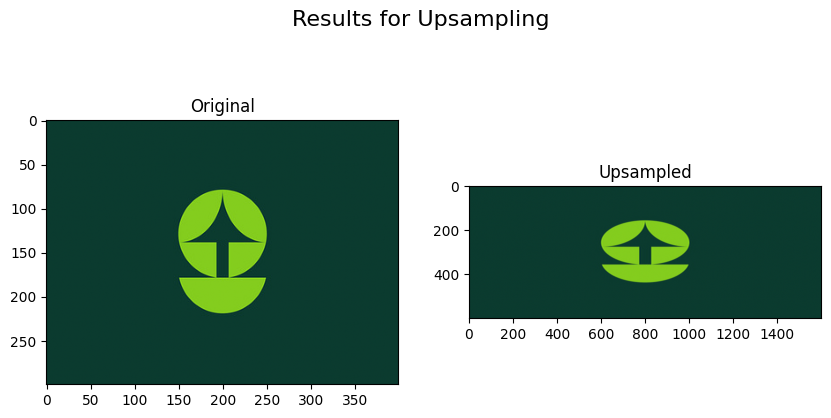

Original shape (300, 400, 3)
Result shape (1200, 800, 3)


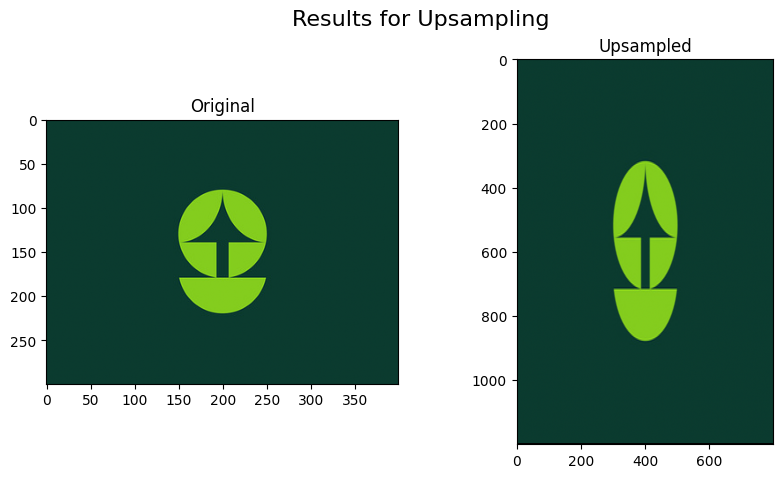

In [6]:
"""
Test upsampling for no-prep approach with variable and dissimilar factors in both dimensions.
"""
im = get_im("no_black_logo.jpg").astype(float) / 255
im = make_even_shape(im)
print("Original shape", im.shape)

upsampled_im = KNN_upsample_variable_factors(im, k=2, factor1=2, factor2=4)
print("Result shape", upsampled_im.shape)

display_upsampling_results(im, upsampled_im)



im = get_im("no_black_logo.jpg").astype(float) / 255
im = make_even_shape(im)
print("Original shape", im.shape)

upsampled_im = KNN_upsample_variable_factors(im, k=2, factor1=4, factor2=2)
print("Result shape", upsampled_im.shape)

display_upsampling_results(im, upsampled_im)


# Cannot compute metrics when upsampling to a shape dissimilar from the original image
# We can compute matrics with respect to the aspect ratio being converted